## Funcional

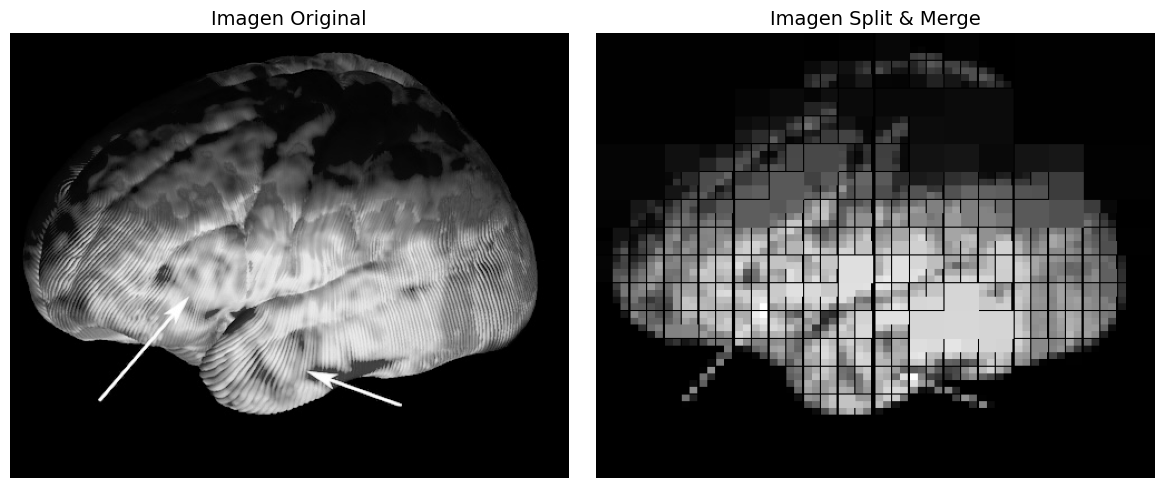

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustables
THRESHOLD = 300      # Umbral de varianza
MIN_SIZE = 8       # Tamaño mínimo de región
IMAGE_PATH = 'assets/adhd_brain.jpeg'

#verigficacion de regions
def is_homogeneous(region):
    return np.var(region) < THRESHOLD

# División de imagen
def split(img, x, y, w, h):
    region = img[y:y+h, x:x+w]
    if w <= MIN_SIZE or h <= MIN_SIZE or is_homogeneous(region):
        return [(x, y, w, h)]
    
    w2, h2 = w // 2, h // 2
    regions = []
    regions += split(img, x, y, w2, h2)
    regions += split(img, x + w2, y, w2, h2)
    regions += split(img, x, y + h2, w2, h2)
    regions += split(img, x + w2, y + h2, w2, h2)
    return regions

# merge
def merge(img, regions):
    canvas = np.zeros_like(img)
    for x, y, w, h in regions:
        region = img[y:y+h, x:x+w]
        mean_val = int(np.mean(region))
        canvas[y:y+h, x:x+w] = mean_val
    return canvas

# todo lo que va a llamar y mostrar
def mostrar_resultados(original, segmentada):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Imagen Original", fontsize=14)
    axes[0].axis('off')

    axes[1].imshow(segmentada, cmap='gray')
    axes[1].set_title("Imagen Split & Merge", fontsize=14)
    axes[1].axis('off')

    plt.tight_layout(pad=2)
    plt.show()

# Función principal
def main():
    image = cv.imread(IMAGE_PATH, cv.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error al cargar la imagen: {IMAGE_PATH}")
        return

    h, w = image.shape
    regions = split(image, 0, 0, w, h)
    segmented = merge(image, regions)
    mostrar_resultados(image, segmented)

if __name__ == "__main__":
    main()
